In [1]:
#import pygame
#palette=pygame.colordict.THECOLORS
import cv2
import wget
from color_util import *
from color_cluster import* 
from skimage.color import rgb2lab, deltaE_cie76,lab2rgb
from skimage import io
import numpy as np
import pandas as pd
import time
palette=pd.read_csv("rgb.txt",header=0,sep='#')
for index, row in palette.iterrows():
    row['colorname']=row['colorname'][:-1]
    row['hexcode']='#'+row['hexcode'][:-1]

In [20]:
hexcode=palette['hexcode']
colorname=palette['colorname']

In [22]:
def hex2rgb(hexcode):
    h= hexcode.lstrip('#')
    return np.array([int(h[i:i+2], 16) for i in (0, 2, 4)],dtype='uint8')

In [35]:
rgb2lab(hex2rgb(hexcode[0])).shape

(3,)

In [4]:
hexcode_lab=np.empty((0,3),dtype='uint8')
for p in hexcode:
    p_lab=(rgb2lab(hex2rgb(p))).reshape((1,3))
    hexcode_lab=np.append(hexcode_lab,p_lab,axis=0)

In [36]:
#pat_time=pd.read_csv("pat_time_nyc_all.csv",sep=",",header=0)

In [37]:
#pop_color=pd.read_csv("pattern_nyc_pop_color_all.csv",header=0,sep="^")

In [43]:
#pop_color.fillna(value=0,inplace=True)

In [5]:
dat=pd.read_csv("project_pop_color_200.csv")
#dat.fillna(value=0,inplace=True)
#pat_time.merge(pop_color,how='inner',on="pattern_id")

In [9]:
#dat=dat[dat.project_id!=0.]

In [6]:
dat.fillna(value=0,inplace=True)
dat=dat.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [7]:
keep=['time']
keep.extend([str(i) for i in range(949)])
dat_time=dat[keep].copy()

In [8]:
for i in range(len(dat_time['time'])):
    dat_time['time'][i]=dat_time['time'][i][:-3]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


KeyboardInterrupt: 

In [45]:
#dat_time['time']=dat['time'][:-3]
dat_time=dat_time.groupby('time').sum()
#dat_time['time']

In [13]:
dat_time=pd.read_csv("project_pop_color_monthly.csv")

In [14]:
start=pd.to_datetime('2015/12')
end=pd.to_datetime('2020/1')
x=dat_time[pd.to_datetime(dat_time.index)>start].copy()
x=x[pd.to_datetime(x.index)<end]
x['tot']=x.sum(axis=1)

In [15]:
x['41']

Series([], Name: 41, dtype: float64)

In [3]:
colorcode=pd.read_excel("color136.xlsx")

In [ ]:
colorcode=colorcode.rename(columns={'Hex Equivalent':'colorname','Unnamed: 1':'hexcode'})
colorcode.iloc[8]["hexcode"]='#F0F8FF'

In [25]:
color_136=np.empty((136,3))
for i in range(136):
    color_136[i]=hex2rgb(colorcode['hexcode'][i])
color_136=color_136.astype('uint8')

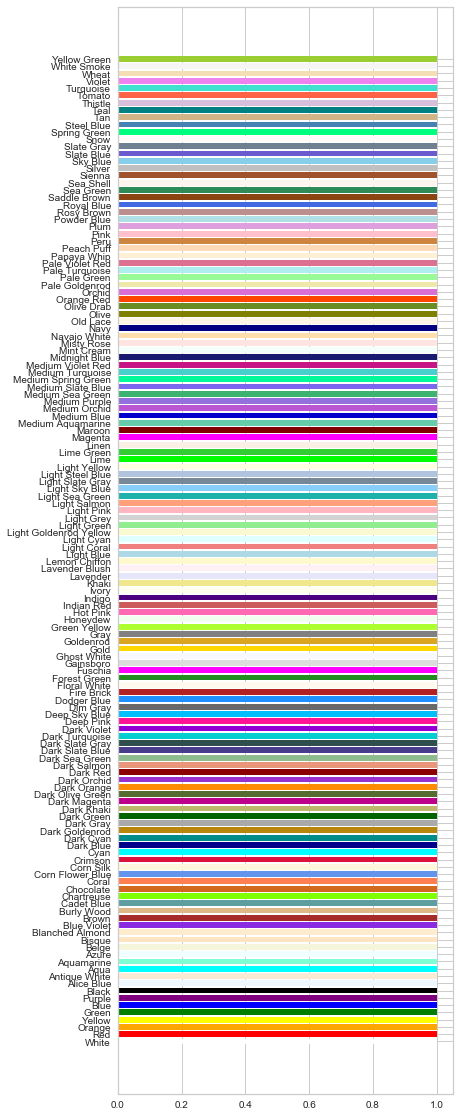

In [26]:
fig, ax = plt.subplots(figsize=(6,20))
ax.barh(range(136),np.ones(136),color=color_136/255.)
plt.yticks(ticks=range(136),labels=colorcode['colorname'])
plt.show()

In [28]:
#rgb2lab(color_136)

In [60]:
color_949_to_136=[]
for i in range(949):
    color_949_to_136.append(
        np.argmin(deltaE_cie76(hexcode_lab[i],rgb2lab(color_136))))

In [24]:
colorcode.iloc[color_949_to_136[0]]


colorname    Light Steel Blue
hexcode               #B0C4DE
Name: 78, dtype: object

In [65]:
column=['time']
column.extend([i for i in range(136)])
color_time_136=pd.DataFrame(columns=column)
color_time_136['time']=dat_time['time']
color_time_136.fillna(value=0,inplace=True)

for i in range(136):
    for j in range(949):
        if color_949_to_136[j]==i:
           # print(j,i)
            color_time_136[i]=np.asarray(color_time_136[i])+np.asarray(dat_time[str(j)])

In [70]:
#color_time_136['tot']=color_time_136.iloc[:, 1:].sum(axis=1)
#color_time_136

(0, 0.16)

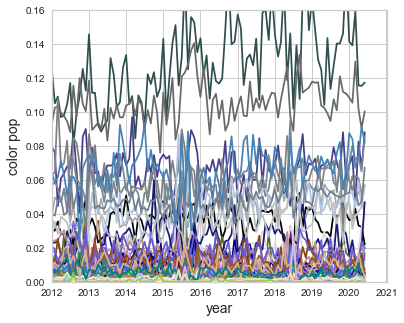

In [212]:
#color_time_136
import matplotlib.dates as mdates
x=color_time_136.copy()
fig, ax = plt.subplots(figsize=(6,5))
ax.plot(pd.to_datetime(x['time']),x[0]/x['tot'],ls=':')#c=colorcode['hexcode'][c])
for c in range(1,136):
    ax.plot(pd.to_datetime(x['time']),x[c]/x['tot'],c=colorcode['hexcode'][c])

datemin = np.datetime64('2012')
datemax = np.datetime64('2021')
ax.set_xlim(datemin,datemax)
years = mdates.YearLocator()
ax.xaxis.set_major_locator(years)

ax.set_xlabel('year',fontsize=14)
ax.set_ylabel('color pop',fontsize=14)
ax.set_ylim(0,0.16)

In [75]:
tot=x.sum(axis=0)
color_count=tot[1:]

In [104]:
color_count=color_count/color_count['tot']
rank=color_count.sort_values(ascending=False)[1:]

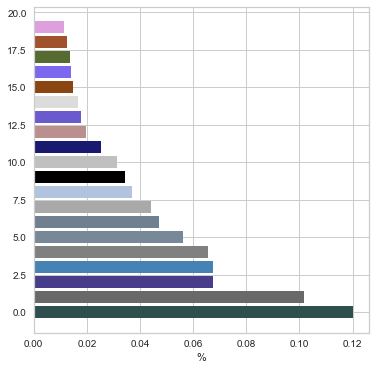

In [229]:
color_rank_index=rank.keys()

fig, ax = plt.subplots(figsize=(6,6))
for i in np.arange(20):
    #print(i)
    #print(rank[color_rank_index[i]])
    #print(color_136[color_rank_index[i]])
    ax.barh(int(i),rank[color_rank_index[i]],color=color_136[color_rank_index[i]]/255.)
    #plt.yticks([i],labels=colorcode['colorname'])
plt.xlabel('%')
plt.show()

Text(0, 0.5, 'dark slate gray popularity')

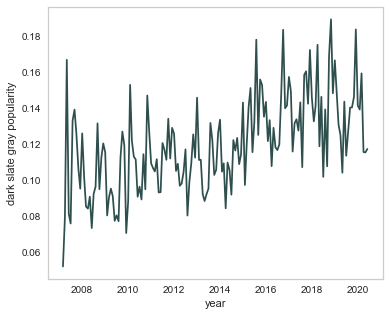

In [58]:
#white
fig, ax = plt.subplots(figsize=(6,5))
ax.grid(False)
ax.plot(pd.to_datetime(x['time']),x['41']/x['tot'],c=colorcode['hexcode'][41])
ax.set_xlabel('year')
ax.set_ylabel('dark slate gray popularity')

Text(0.5, 0, 'time lag')

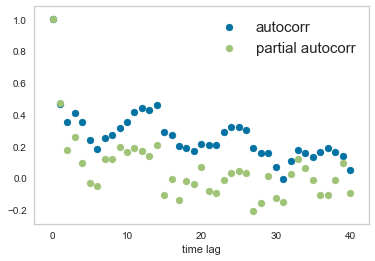

In [119]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
pcf= pacf(x[41]/x['tot'])
af=acf(x[41]/x['tot'])
plt.grid(False)
plt.scatter(range(41),af,label='autocorr')
plt.scatter(range(41),pcf,label='partial autocorr')
plt.legend(fontsize=15)
plt.xlabel('time lag')

In [16]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
f=pd.read_csv("pro41_color_month_forecast.csv")
f_test=pd.read_csv("forecast_test.csv")




In [23]:
x1=x['41']/x['tot']
trend=f.trend[:160]
x1=x1-trend

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


NameError: name 'mdates' is not defined

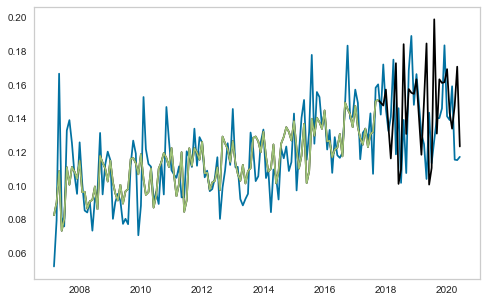

In [21]:
train_data=x.iloc[:128]['41']/x.iloc[:128]['tot']
test_data=x.iloc[128:]['41']/x.iloc[:128]['tot']
time=pd.to_datetime(f['ds'])
#mod = sm.tsa.statespace.SARIMAX(train_data, trend=[1,1,0,0], order=(3,0,0), seasonal_order=(1,0,0,12))
#results = mod.fit()
fig, ax = plt.subplots(figsize=(8,5))
ax.grid(False)
#predict=results.predict(0,160)
ax.plot(time[:160],x['41']/x['tot'])
#plt.plot(predict,color='black')
#ax.plot(time,f.yhat,color='black')
ax.plot(time[:160],f_test.yhat[:160],color='black')
ax.plot(time[:128],f_test.yhat[:128])
#plt.ylim(3,6)
years = mdates.YearLocator()
#months = mdates.MonthLocator()
ax.xaxis.set_major_locator(years)
ax.set_xlabel('year',fontsize=14)
ax.set_ylabel(colorcode['colorname'][41]+' % pop',fontsize=14)
datemin = np.datetime64('2018')
datemax = np.datetime64('2021')
ax.set_xlim(datemin,datemax)
plt.show()


Time series data

In [181]:
#x.to_csv("pro_color_time_for_ts.csv")  ### 
#x
m = Prophet(yearly_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(freq='M',periods=12)
forecast = m.predict(future)

In [17]:
x=pd.read_csv("pro_color_time_for_ts.csv")

In [14]:
np.mean(abs(((x['41']/x['tot'])[128:]-f_test.yhat[128:160])/(x['41']/x['tot'])[128:]))

0.187931430648725

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


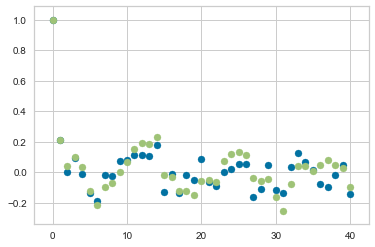

In [37]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
pcf= pacf(x1)
af=acf(x1)
plt.scatter(range(41),pcf)
plt.scatter(range(41),af)

In [483]:
#x.to_csv("color_pop_time_nyc_pattern_all.csv")

In [250]:
image_id=748148
image=cv2.imread(str(image_id)+'.jpg')
def image_pop_color(image,image_id):

    image=prepare_image(image).astype('uint8')
    image_lab=rgb2lab(image)
    num_pix=image.shape[0]
    image_color_index=[]

    start_time=time.time()
    for i in range(num_pix):
        image_color_index.append(
            np.argmin(deltaE_cie76(image_lab[i],hexcode_lab)))

    (unique, counts)=np.unique(image_color_index, return_counts=True)
    frequency={u:c for(u,c) in zip(unique, counts)}
    frequency['pattern_id']=image_id
    end_time=time.time()
    print('time',end_time-start_time)
    return frequency

In [22]:
#f=image_pop_color(image,image_id)
forecast=pd.read_csv("color_pop_forecast_c0.csv")

In [21]:
forecast=pd.read_csv("color_pop_forecast_c0.csv")

In [24]:
x2=pd.read_csv("color_pop_time_nyc_pattern_all.csv")

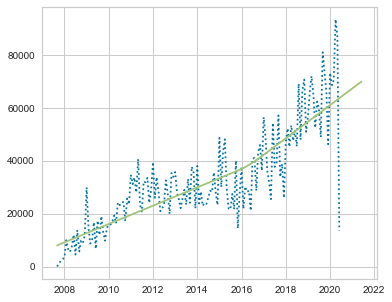

In [30]:
fig, ax = plt.subplots(figsize=(6,5))
ax.plot(pd.to_datetime(x['time']),x['0'],ls=':')
ax.plot(pd.to_datetime(forecast['ds']), forecast['trend'])

In [217]:
print(color_rank_index[10:30])

Index([120,  94, 114, 122,  52, 116,  90,  34, 119, 112,  98, 127,  23,  39,
        76,  88,  19,  27, 128, 115],
      dtype='object')


(0, 0.16)

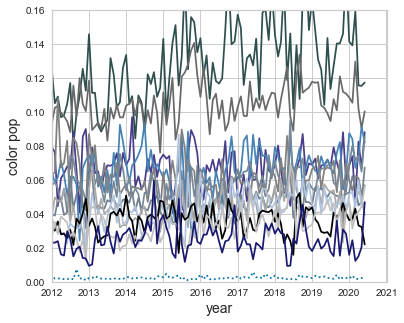

In [228]:
fig, ax = plt.subplots(figsize=(6,5))
ax.plot(pd.to_datetime(x['time']),x[0]/x['tot'],ls=':')#c=colorcode['hexcode'][c])

#range(10)*2
for c in color_rank_index[:12]:
    ax.plot(pd.to_datetime(x['time']),x[c]/x['tot'],c=colorcode['hexcode'][c])

datemin = np.datetime64('2012')
datemax = np.datetime64('2021')
ax.set_xlim(datemin,datemax)
years = mdates.YearLocator()
ax.xaxis.set_major_locator(years)

ax.set_xlabel('year',fontsize=14)
ax.set_ylabel('color pop',fontsize=14)
ax.set_ylim(0,0.16)

In [42]:
from scipy import stats 
stats.pearsonr(x1[8:],(x2['41']/x2['tot'])[2:])

(0.2985071441100732, 0.00018742107861764823)

(-0.6, 0.6)

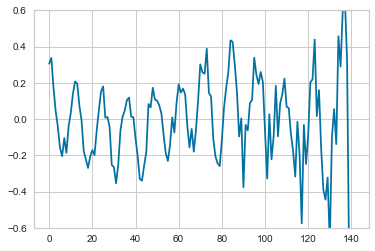

In [49]:
# cross correlation between pattern & design color

from statsmodels.tsa.stattools import ccf
crosscorr=ccf(x1[8+10:],(x2['41']/x2['tot'])[2+10:])
plt.plot(crosscorr)
plt.ylim(-0.6,0.6)

(0.1, 0.16)

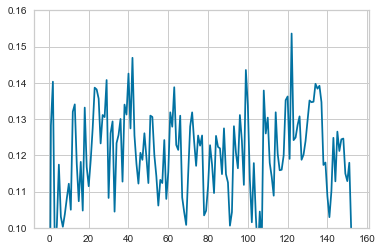

In [51]:
plt.plot(x2['41']/x2['tot'])
plt.ylim(0.1,0.16)

In [6]:
colorcode

,Hex Equivalent,Unnamed: 1
0,White,#FFFFFF
1,Red,#FF0000
2,Orange,#FFA500
3,Yellow,#FFFF00
4,Green,#008000
5,Blue,#0000FF
6,Purple,#800080
7,Black,#000000
8,Alice Blue,#FOF8FF
9,Antique White,#FAEBD7
